<a href="https://colab.research.google.com/github/flubber-lab/Customer-Purchase-Behavior-Analysis/blob/main/Customer_purchase_behaviour_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("/content/Customer Purchase Data.csv")
df.head()

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
0,1,56,61350.84215,12372.864450,15,77.685590,6232.122440
1,2,46,53777.18224,11001.604230,10,51.858351,5545.849698
2,3,32,39460.32263,8007.385018,19,98.166371,4054.645293
3,4,60,66672.12210,13526.548370,12,62.530976,6815.544393
4,5,38,44459.08553,9059.304083,9,46.470533,4617.833484


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number                1362 non-null   int64  
 1   Age                   1362 non-null   int64  
 2   Income                1362 non-null   float64
 3   Spending_Score        1362 non-null   float64
 4   Membership_Years      1362 non-null   int64  
 5   Purchase_Frequency    1362 non-null   float64
 6   Last_Purchase_Amount  1362 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 74.6 KB


In [5]:
df.duplicated().sum()

0

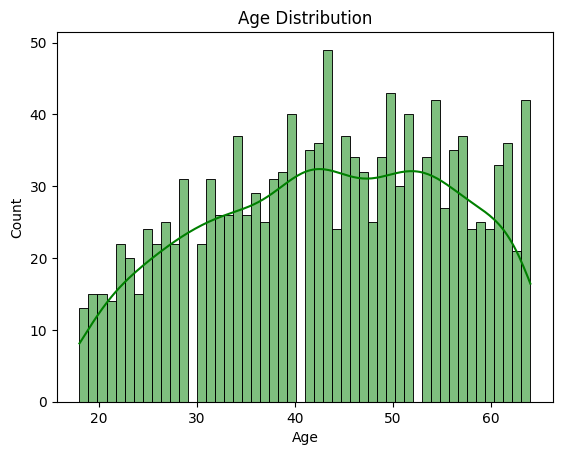

In [11]:
sns.histplot(df['Age'], kde=True, bins = 50, color = 'green')
plt.title("Age Distribution")
plt.show()

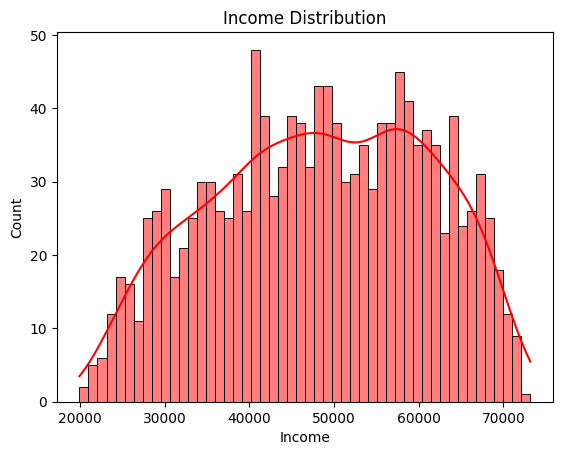

In [17]:
sns.histplot(df['Income'], kde= True, bins = 50, color = 'red')
plt.title("Income Distribution")
plt.show()

In [19]:
summ = df.describe()
print(summ)

            Number          Age        Income  Spending_Score  \
count  1362.000000  1362.000000   1362.000000     1362.000000   
mean    681.500000    43.251836  48317.193784     9765.372547   
std     393.319844    12.533236  12648.638324     2531.133100   
min       1.000000    18.000000  19946.675740     4064.177336   
25%     341.250000    33.000000  38532.229703     7830.921337   
50%     681.500000    43.000000  48758.233625     9850.200389   
75%    1021.750000    54.000000  58579.901010    11810.345793   
max    1362.000000    64.000000  73182.569800    14791.611800   

       Membership_Years  Purchase_Frequency  Last_Purchase_Amount  
count       1362.000000         1362.000000           1362.000000  
mean           9.513950           49.551706           4931.689546  
std            5.417624           27.074169           1266.894447  
min            1.000000            4.876052           2057.551913  
25%            5.000000           26.560455           3962.190531  
50%   

In [21]:
cm = df.corr()
cm

,Number,Age,Income,Spending_Score,Membership_Years,Purchase_Frequency,Last_Purchase_Amount
Number,1.000000,0.008052,0.010448,0.009748,-0.024749,-0.025027,0.010388
Age,0.008052,1.000000,0.987352,0.987021,0.166122,0.164741,0.986614
Income,0.010448,0.987352,1.000000,0.999805,0.163339,0.162079,0.999492
Spending_Score,0.009748,0.987021,0.999805,1.000000,0.163051,0.161782,0.999692
Membership_Years,-0.024749,0.166122,0.163339,0.163051,1.000000,0.999322,0.162773
Purchase_Frequency,-0.025027,0.164741,0.162079,0.161782,0.999322,1.000000,0.161505
Last_Purchase_Amount,0.010388,0.986614,0.999492,0.999692,0.162773,0.161505,1.000000


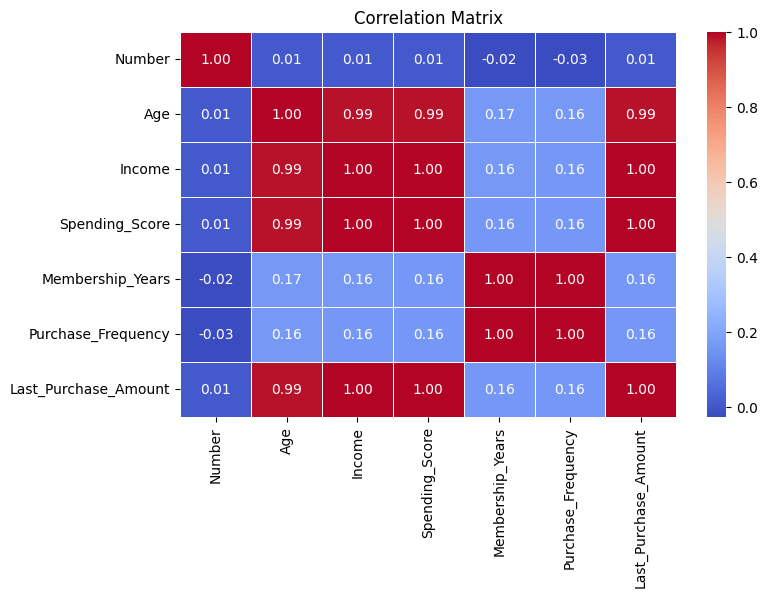

In [35]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


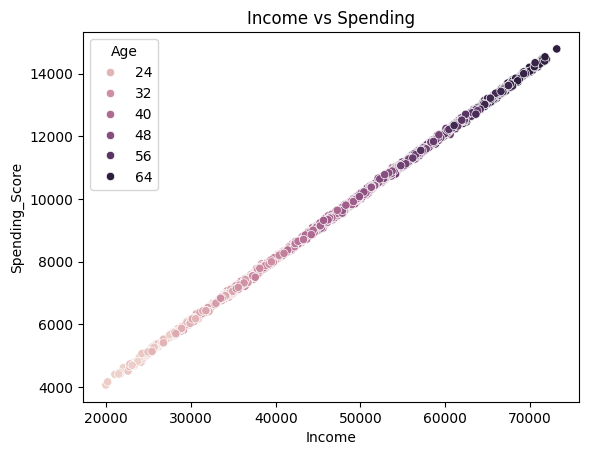

In [29]:
#Income vs Spending

sns.scatterplot(x = 'Income', y='Spending_Score', data = df, hue = 'Age')
plt.title("Income vs Spending")
plt.show()

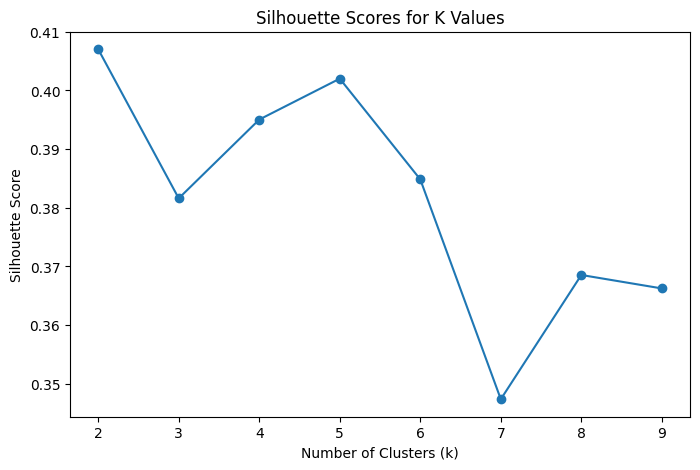

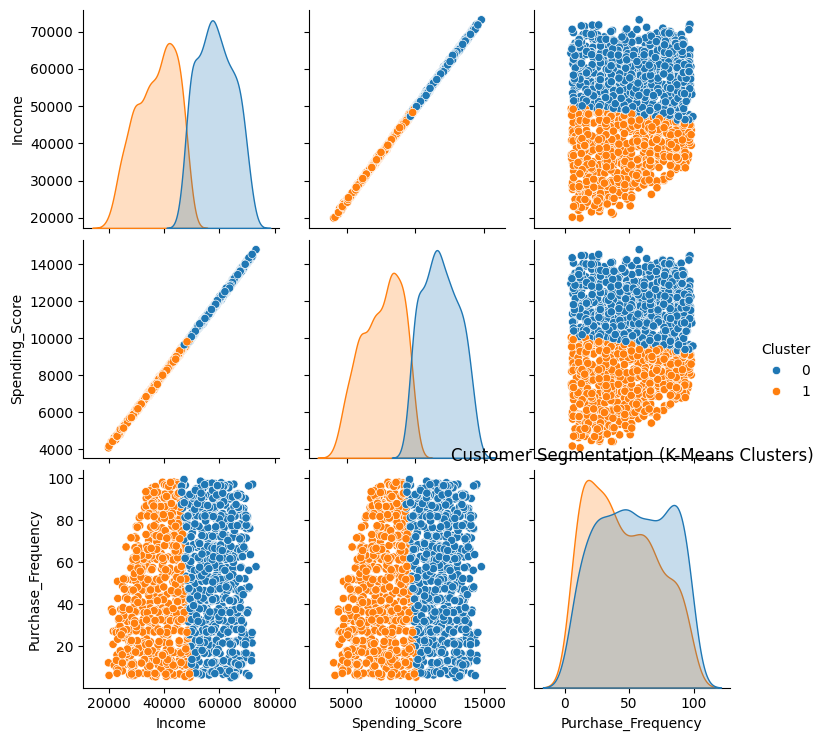

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select features for clustering
features = df[['Income', 'Spending_Score', 'Purchase_Frequency']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Apply K-Means with the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the resulting clusters
sns.pairplot(df, vars=['Income', 'Spending_Score', 'Purchase_Frequency'], hue='Cluster', palette='tab10')
plt.title('Customer Segmentation (K-Means Clusters)')
plt.show()


In [37]:
# Calculate average values of features for each cluster
cluster_summary = df.groupby('Cluster')[['Income', 'Spending_Score', 'Purchase_Frequency', 'Last_Purchase_Amount']].mean()
print(cluster_summary)

# Count customers in each cluster
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


               Income  Spending_Score  Purchase_Frequency  \
Cluster                                                     
0        58580.393252    11819.277282           53.861669   
1        37239.205962     7548.409726           44.899577   

         Last_Purchase_Amount  
Cluster                        
0                 5958.852902  
1                 3822.980397  
Cluster Counts:
Cluster
0    707
1    655
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df[['Age', 'Income', 'Membership_Years', 'Purchase_Frequency']]
y = df['Last_Purchase_Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print(f"Model Score: {model.score(X_test, y_test)}")


Model Score: 0.9987667621676877
